In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784", version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.float)

/var/folders/vq/zccc3xt90bg0bg15g24q6brh0000gp/T/ipykernel_15988/971646158.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [10]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

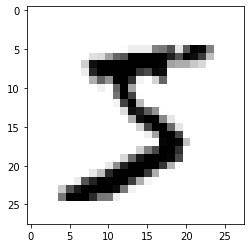

In [15]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
y_train_5 = (y_train == 5)

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


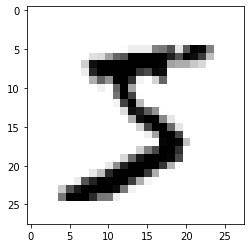

In [34]:
n = 2
plt.imshow(x[0].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95787927, 0.93583543, 0.96418294])

### A matriz de confusão

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[43257,  1364],
       [  532,  3847]])

In [40]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.7382460180387641
Recall:  0.8785110755880338


In [43]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[43257  1364]
 [  532  3847]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98     44621
        True       0.74      0.88      0.80      4379

    accuracy                           0.96     49000
   macro avg       0.86      0.92      0.89     49000
weighted avg       0.97      0.96      0.96     49000



### Classificação multiclasse

In [44]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [45]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [57]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4566    2   37   12    6   24   85    2   56   26]
 [   1 5223   51   12    8   19   17    9  173   11]
 [  27   43 4253   95   39   22  149   46  155   22]
 [  18   20  234 4121   10  244   53   44  191   62]
 [  12   26   55   20 4181   20  157   22   82  268]
 [  53   21   46  146   50 3409  292   24  271   67]
 [  17    7   51    1   14   29 4668    1   23    0]
 [  19   23   97   49   48   19   11 4449   54  327]
 [  30  111  145  145   39  213  120   31 3873  105]
 [  22   33   51   74  122   61    3  152  107 4246]]
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      4816
         1.0       0.95      0.95      0.95      5524
         2.0       0.85      0.88      0.86      4851
         3.0       0.88      0.82      0.85      4997
         4.0       0.93      0.86      0.89      4843
         5.0       0.84      0.78      0.81      4379
         6.0       0.84      0.97      0.90      4811
         7.0       0.93      0.87   

<AxesSubplot:>

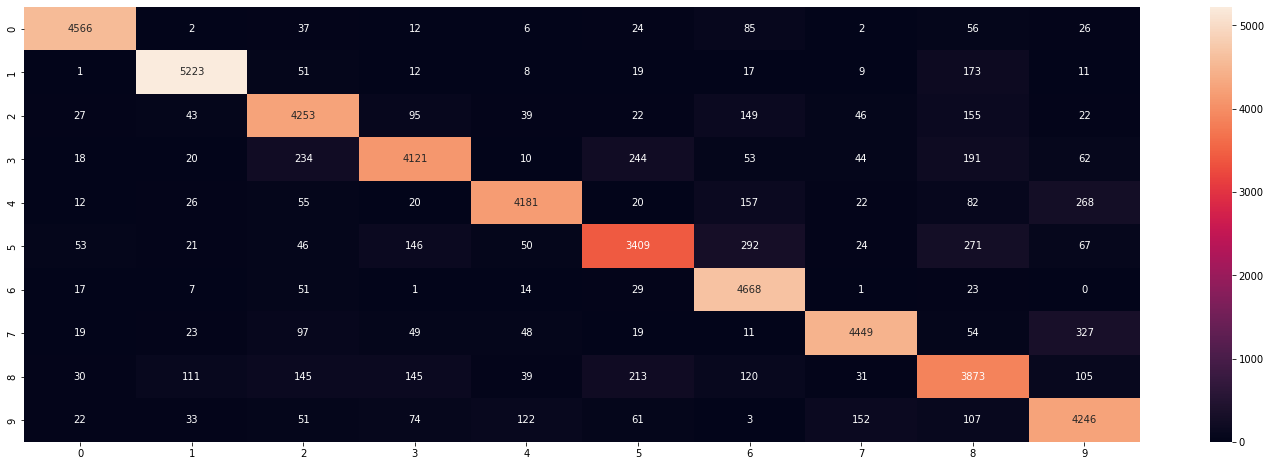

In [58]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<AxesSubplot:>

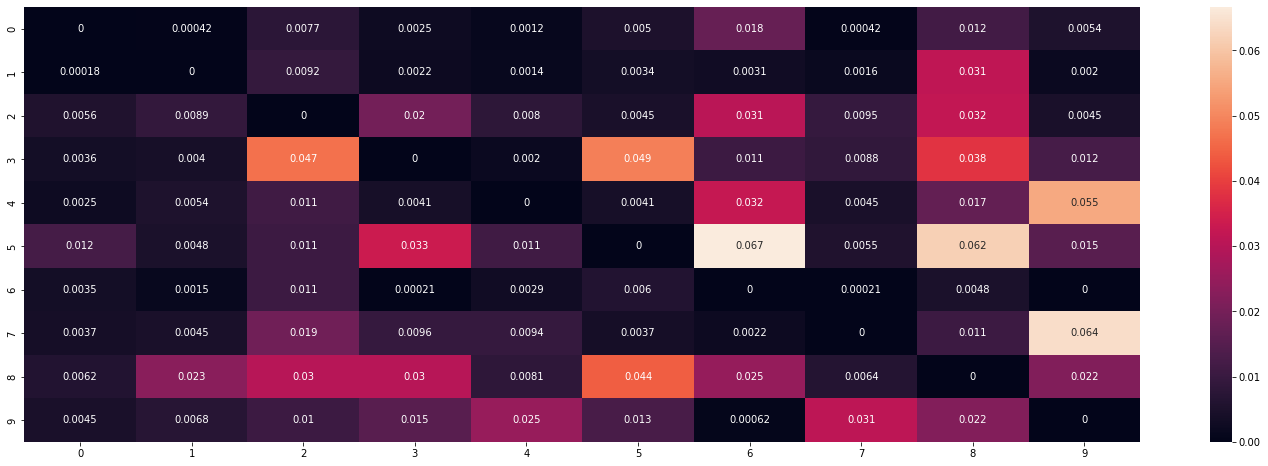

In [60]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)